In [1]:
import sys
sys.path.append('../')

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchio as tio
import torchvision.transforms as transforms

from modules.Dataset import *
from modules.Utils import plot_sub

In [3]:
dataset_train = FeTABalancedDistribution
dataset_path_train = os.path.join('..\\Data', 'feta_processed2')
train = MRIDataset(dataset_train, "train", dataset_path_train)

In [4]:
sample = train[0]

In [63]:
def plot_augmentations(mri, mask):    
    index = mri.shape[1] // 2
    plot_sub(np.rot90(mri[0, index, :, :]), np.rot90(mask[0, index, :, :]))
    
    index = mri.shape[2] // 2
    plot_sub(np.rot90(mri[0, :, index, :]), np.rot90(mask[0, :, index, :]))
    
    index = mri.shape[3] // 2
    plot_sub(np.rot90(mri[0, :, :, index]), np.rot90(mask[0, :, :, index]))

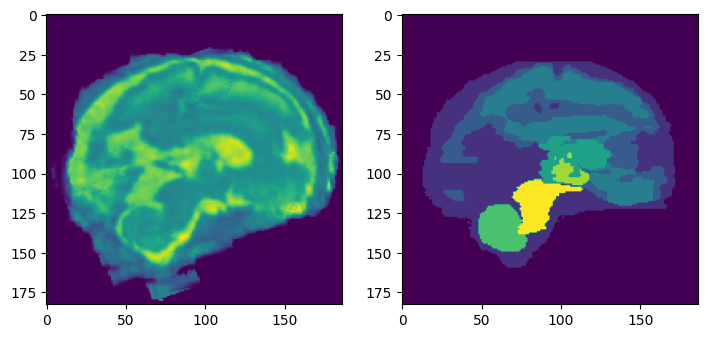

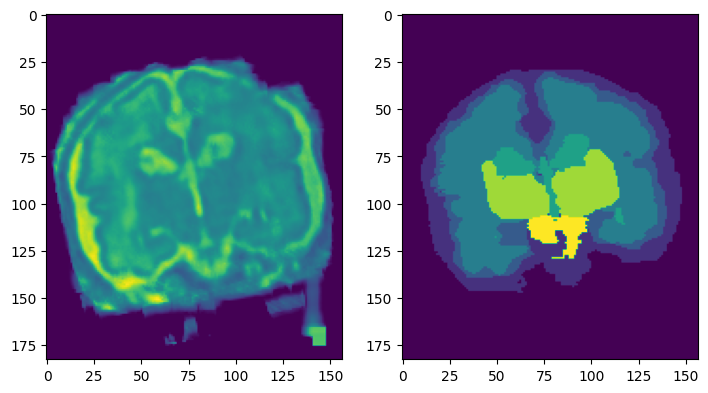

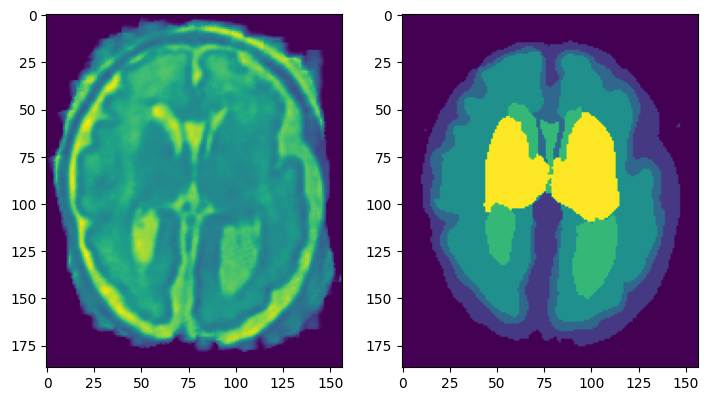

In [64]:
mri = sample.mri.data
mask = sample.mask.data

plot_augmentations(mri, mask)

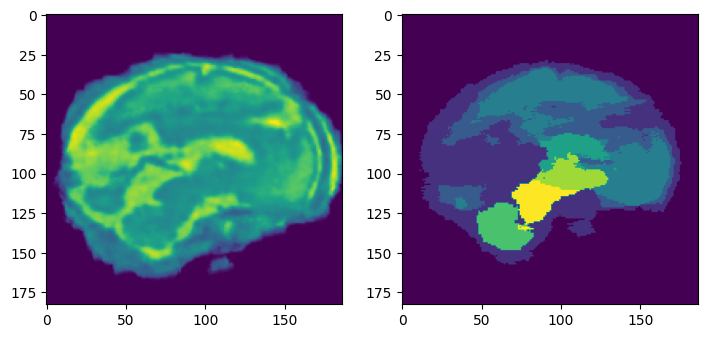

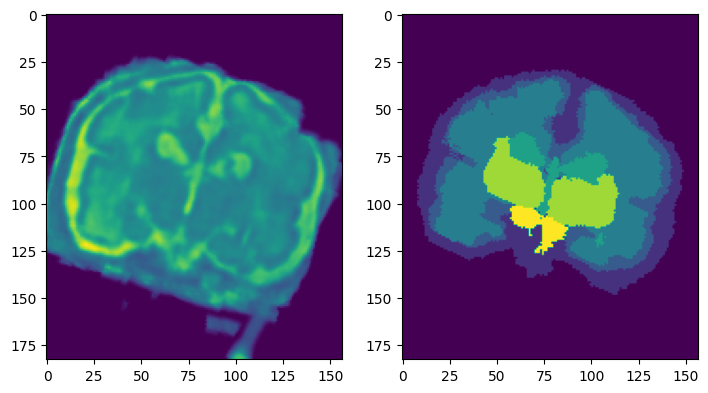

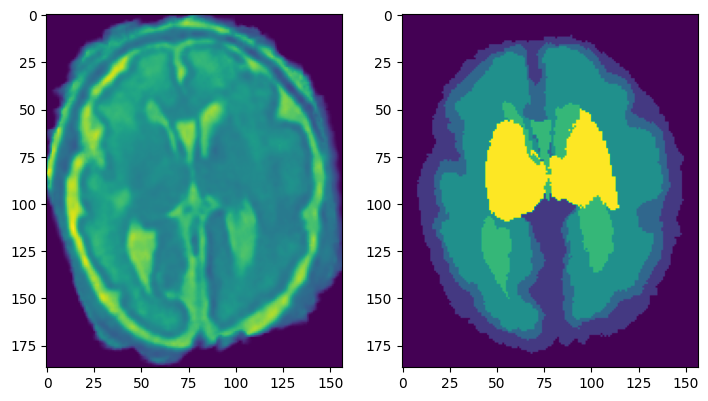

In [66]:
random_affine = tio.transforms.RandomAffine(scales=(0.95, 1.05), degrees=(0, 30))
out = random_affine(sample)
plot_augmentations(out.mri.data, out.mask.data)

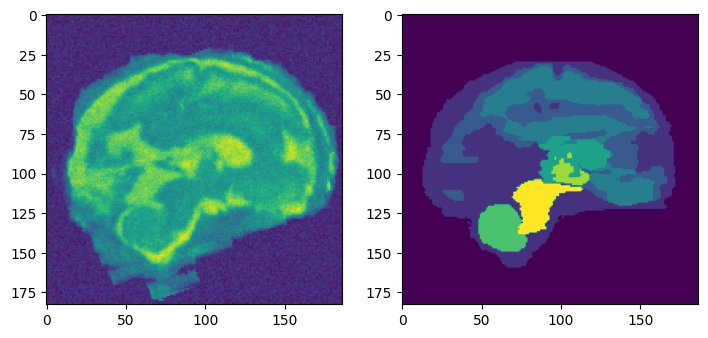

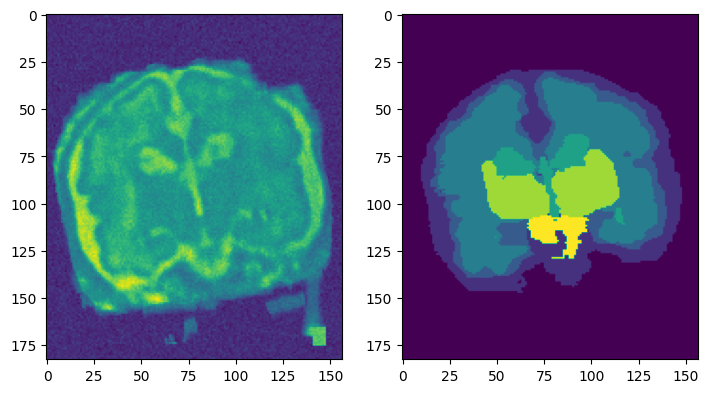

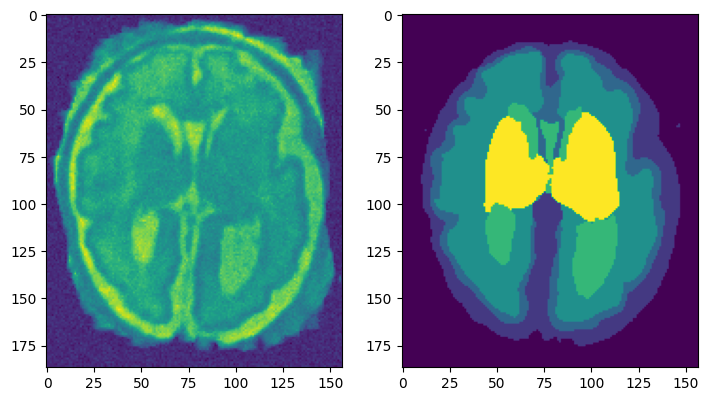

In [68]:
random_noise = tio.transforms.RandomNoise()
out = random_noise(sample)
plot_augmentations(out.mri.data, out.mask.data)

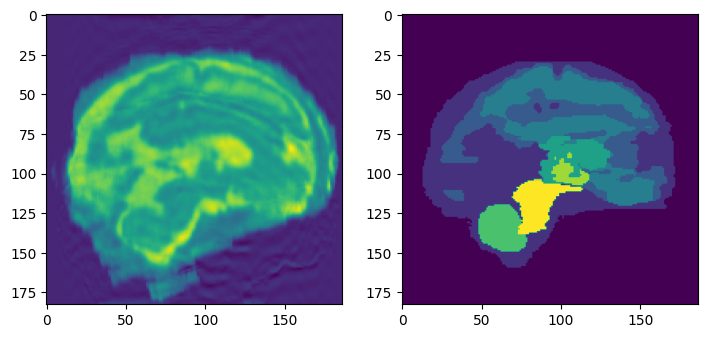

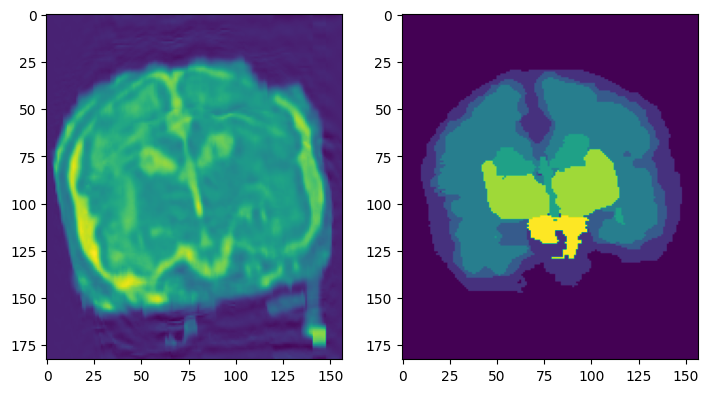

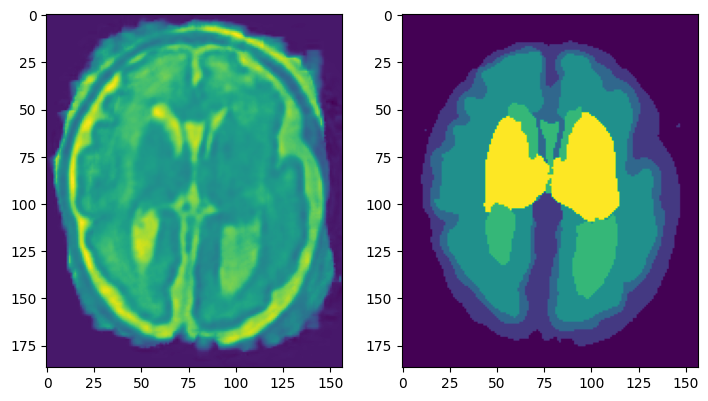

In [70]:
random_motion = tio.transforms.RandomMotion()
out = random_motion(sample)
plot_augmentations(out.mri.data, out.mask.data)

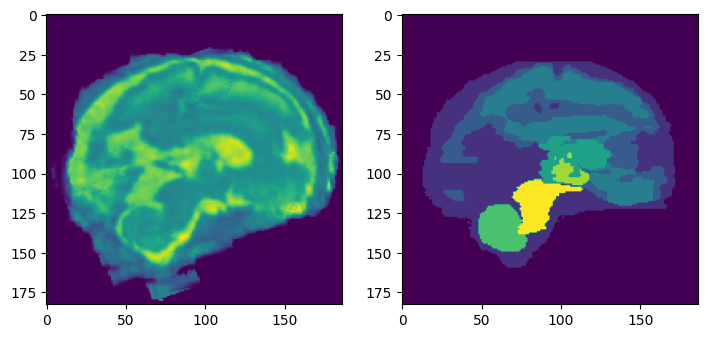

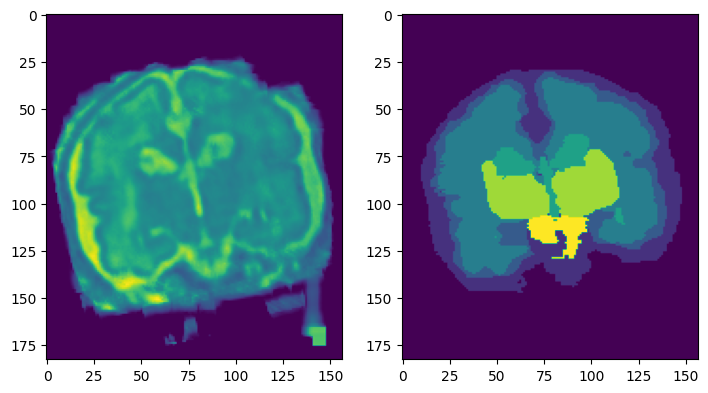

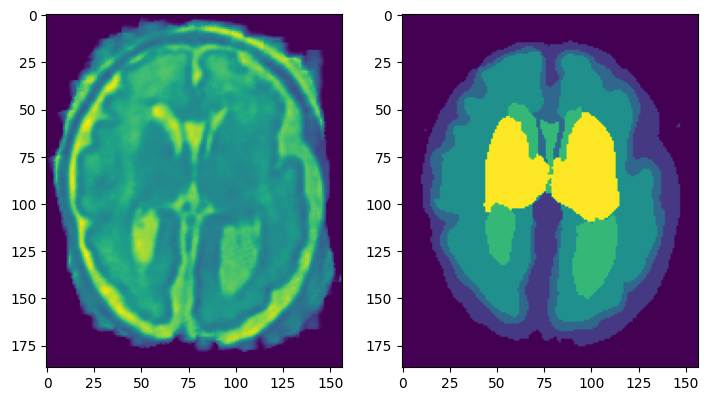

In [84]:
random_flip = tio.transforms.RandomFlip(axes=[0, 1])
out = random_flip(sample)
plot_augmentations(out.mri.data, out.mask.data)

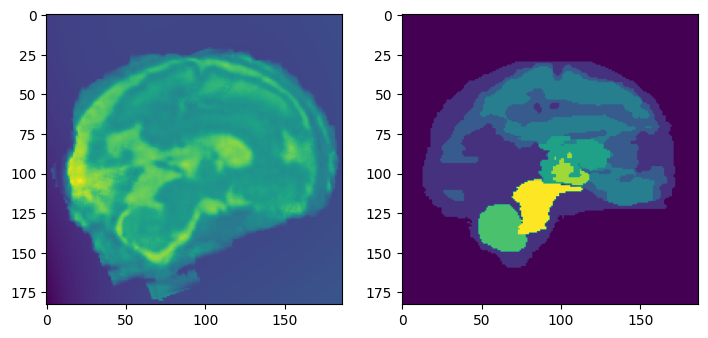

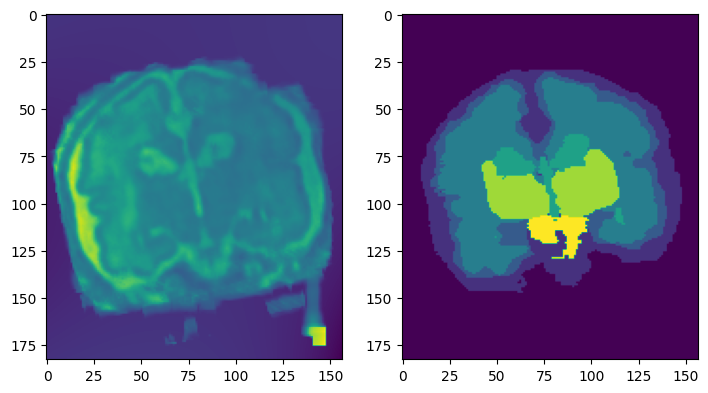

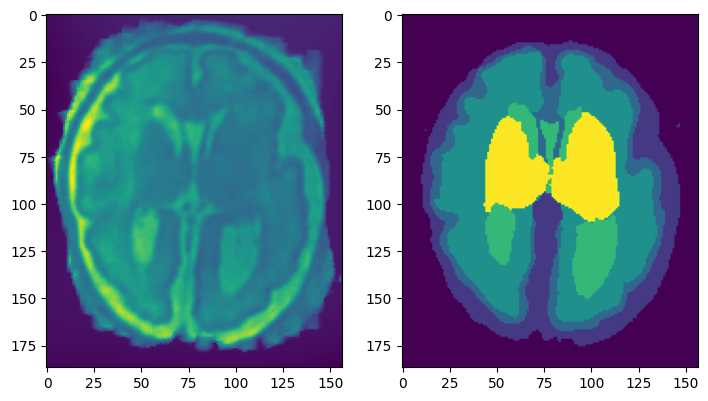

In [87]:
random_bias_field = tio.transforms.RandomBiasField()
out = random_bias_field(sample)
plot_augmentations(out.mri.data, out.mask.data)

In [90]:
transofrms = transforms.Compose([tio.transforms.RandomAffine(scales=(0.95, 1.05), degrees=(0, 30)),
                                 tio.transforms.RandomFlip(axes=[0, 1]),
                                 tio.transforms.RandomBiasField(), tio.transforms.RandomMotion(), 
                                 tio.RandomNoise()])

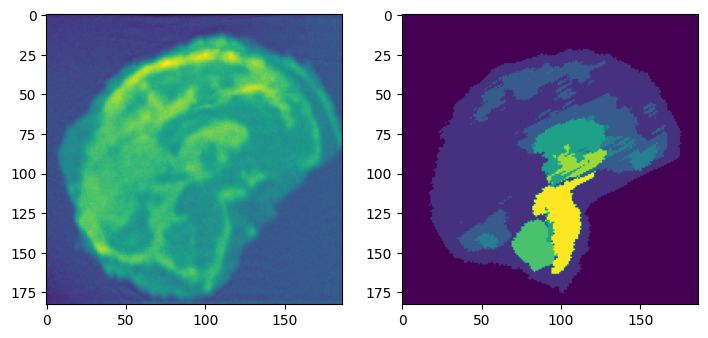

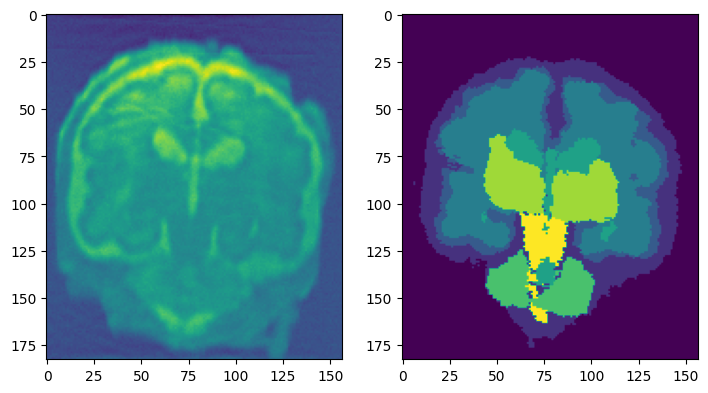

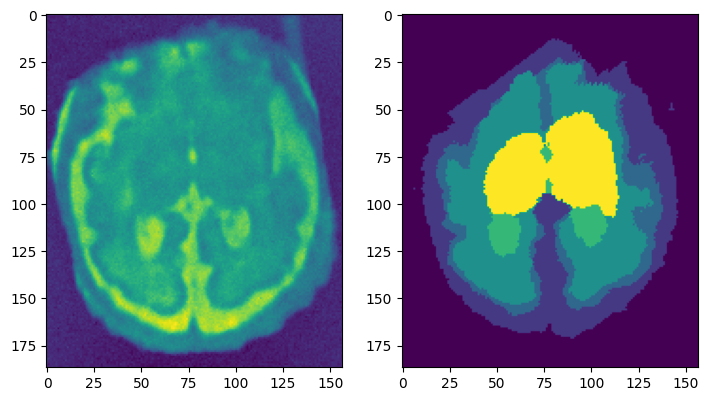

In [93]:
out = transofrms(sample)
plot_augmentations(out.mri.data, out.mask.data)

In [94]:
transofrms2 = tio.OneOf({tio.transforms.RandomAffine(scales=(0.95, 1.05), degrees=(0, 30)),
                                 tio.transforms.RandomFlip(axes=[0, 1]),
                                 tio.transforms.RandomBiasField(), tio.transforms.RandomMotion(), 
                                 tio.RandomNoise()})

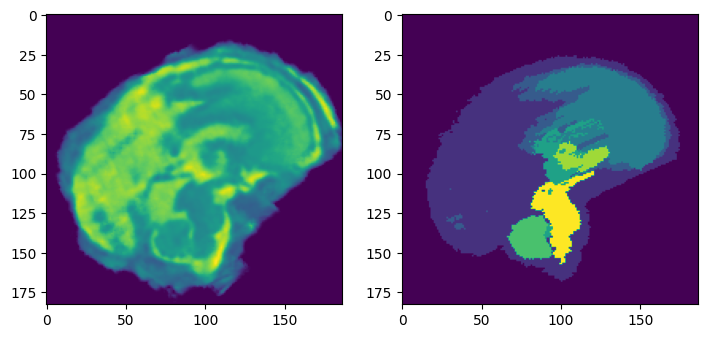

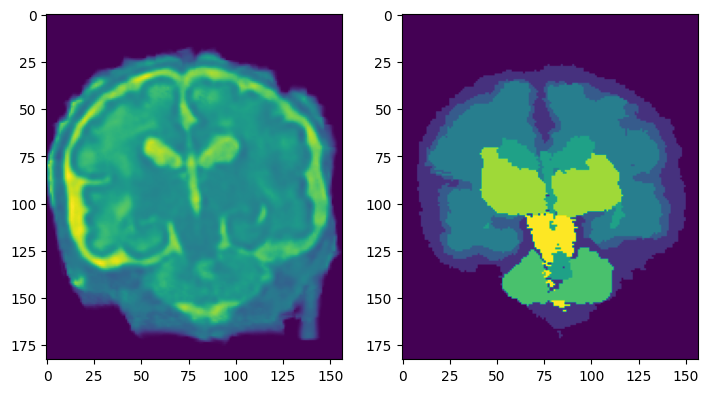

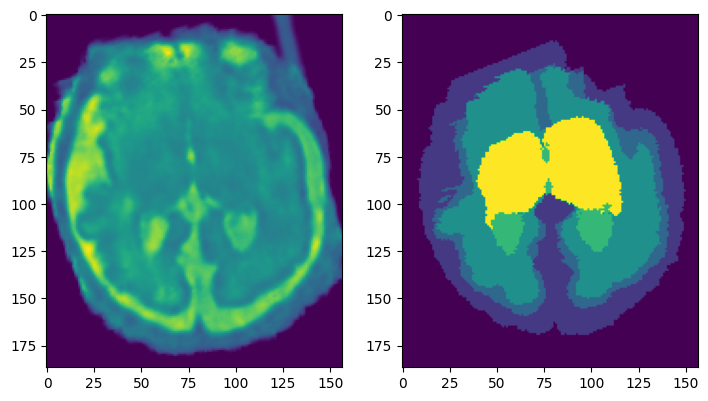

In [99]:
out = transofrms2(sample)
plot_augmentations(out.mri.data, out.mask.data)